# <center>Topic Modelling using PLSA</center> 

### Output/explain the following steps in the code:
### a) The vocabulary of words used.
### b) Words document Co-occurrence matrix
### c) Words under each topic and the score
### For the given dataset, use the first 100,000 headlines and 20 topics.

In [1]:
! pip install nltk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;#latent vector<-factorization to get topics(into 2)
from sklearn.preprocessing import normalize;

Link to Dataset - https://www.kaggle.com/therohk/million-headlines

### Understanding the Tfidftransformer usage

Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval, that has also found good use in document classification.

The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

In [2]:
df=pd.read_csv('/home/rupeek/Desktop/ML &AI/assns/archive/india-news-headlines.csv')

In [3]:
df.head(10)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic
6,20010102,unknown,Dilute the power of transfers; says Riberio
7,20010102,unknown,Focus shifts to teaching of Hindi
8,20010102,unknown,IT will become compulsory in schools
9,20010102,unknown,Move to stop freedom fighters' pension flayed


In [4]:
data_text = df[['headline_text']].astype('str')

In [5]:
data_text.shape

(3297172, 1)

In [11]:
#instantiate CountVectorizer()
cv=CountVectorizer()#create matrix dXm(doc and words)
 
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(data_text["headline_text"])
 

In [12]:
word_count_vector.shape#153 no. of words

(3297172, 209273)

In [13]:
tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)#gives weightage to important word(most repeated;term freqXinverse doc freq);inverse the freq
tf_idf_vector = tfidf_transformer.fit_transform(word_count_vector)

In [14]:
cv.get_feature_names()#vocabulary

['00',
 '000',
 '0000',
 '00000',
 '0000015',
 '0000cr',
 '0001',
 '0005',
 '0007',
 '0009',
 '000cc',
 '000cr',
 '000cressar',
 '000crore',
 '000for',
 '000ft',
 '000gw',
 '000ha',
 '000hp',
 '000k',
 '000kg',
 '000km',
 '000kmph',
 '000kv',
 '000kw',
 '000l',
 '000lt',
 '000ltr',
 '000m',
 '000m3',
 '000mah',
 '000mbps',
 '000mld',
 '000mm',
 '000mt',
 '000mw',
 '000on',
 '000oz',
 '000pm',
 '000pound',
 '000s',
 '000sq',
 '000sqft',
 '000sqm',
 '000th',
 '000v',
 '001',
 '0013',
 '0017',
 '002',
 '003',
 '004',
 '0042',
 '0045',
 '0048',
 '004th',
 '005',
 '0050',
 '0055',
 '0057',
 '006',
 '0061481453550',
 '007',
 '007cr',
 '007s',
 '008',
 '009',
 '00968',
 '00am',
 '00cr',
 '01',
 '010',
 '0100',
 '0102',
 '0104',
 '0105',
 '010620',
 '0107',
 '010cr',
 '011',
 '0112',
 '0116',
 '012',
 '0120',
 '0124',
 '013',
 '0130',
 '014',
 '0141',
 '0148',
 '0149',
 '014cr',
 '015',
 '0150',
 '016',
 '017',
 '017cr',
 '017km',
 '018',
 '018cr',
 '019',
 '019cr',
 '01cold',
 '01justify',
 '

In [15]:
data_text=data_text.loc[1:100000,:]#taking 1 lakhh as its huge dataset

In [16]:
feature_names = cv.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=tf_idf_vector[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)#based on freq,removing stop words

,tfidf
undertaker,0.414056
cena,0.408043
defeating,0.366986
satisfying,0.366506
roman,0.350213
...,...
formateed,0.000000
formation,0.000000
formations,0.000000
formative,0.000000


---

In [17]:
stopw=stopwords.words('english')
stopw
def stopwords_remove(x):
    terms=x.split()#get the words
    terms=[w for w in terms if w not in stopw]#if word isnt possible in stopw
    sentence=' '.join(terms)#joining words after stopword removal
    return sentence
data_text['Refined_headlines']=data_text['headline_text'].apply(lambda x: stopwords_remove(x))#sentence without sopw

In [18]:
def word_count(x):#no. of terms in data
    terms = x.split()
    return len(terms)
data_text['Word_Count']=data_text['Refined_headlines'].apply(lambda x: word_count(x))

In [19]:
data_text.head()

,headline_text,Refined_headlines,Word_Count
1,Status quo will not be disturbed at Ayodhya; s...,Status quo disturbed Ayodhya; says Vajpayee,6
2,Fissures in Hurriyat over Pak visit,Fissures Hurriyat Pak visit,4
3,America's unwanted heading for India?,America's unwanted heading India?,4
4,For bigwigs; it is destination Goa,For bigwigs; destination Goa,4
5,Extra buses to clear tourist traffic,Extra buses clear tourist traffic,5


In [20]:
data_text['Word_Count'].describe()

count    100000.000000
mean          4.751210
std           1.341384
min           1.000000
25%           4.000000
50%           5.000000
75%           6.000000
max          16.000000
Name: Word_Count, dtype: float64

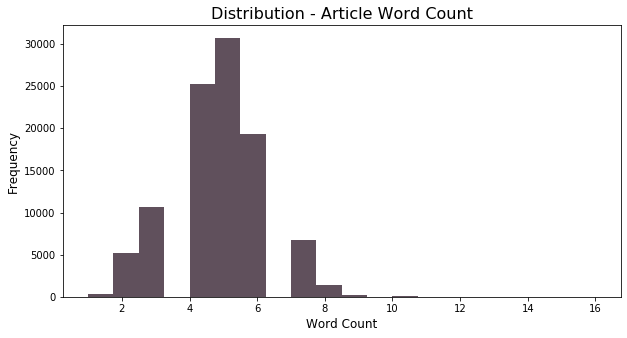

In [21]:
fig = plt.figure(figsize=(10,5))

plt.hist(
    data_text['Word_Count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)

plt.show()#to check spread of word

In [22]:
headline_sentences=[''.join(text) for text in data_text['Refined_headlines']]

In [23]:
#modeling
vectorizer = CountVectorizer(max_features=5000)#top 5000 words;co occurance matrix creation
x_counts = vectorizer.fit_transform(headline_sentences)#no. of words chosen; data understanding(EDA)

In [24]:
x_counts

<100000x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 374810 stored elements in Compressed Sparse Row format>

In [25]:
transformer = TfidfTransformer(smooth_idf=False);#transformer
x_tfidf = transformer.fit_transform(x_counts);

In [26]:
x_tfidf

<100000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 374810 stored elements in Compressed Sparse Row format>

In [27]:
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)#normalising gives better rsult;row normalisation(scales values b/w 0 & 1)

In [28]:
#number of topics
num_topics=20 #guess 
#obtain a NMF model.
model = NMF(n_components=num_topics, init='nndsvd');#non negative svd
#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=20, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [29]:
def get_nmf_topics(model, n_top_words):#top words for 10 topics
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-n_top_words - 1:-1]#top words in descending order(argsort default ascending)
        words = [feat_names[key] for key in words_ids]#words list
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words
    
    return pd.DataFrame(word_dict)

In [30]:
get_nmf_topics(model, 30)#top 30 words from topic

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,Topic # 11,Topic # 12,Topic # 13,Topic # 14,Topic # 15,Topic # 16,Topic # 17,Topic # 18,Topic # 19,Topic # 20
0,the,india,city,new,it,govt,no,police,held,bjp,day,killed,meet,power,sacred,life,dead,back,us,time
1,speaking,pak,round,year,says,state,says,case,man,cong,celebrated,two,today,state,peace,get,shot,get,cm,get
2,counsellor,china,sports,gets,industry,hc,please,delhi,case,up,one,road,begins,supply,god,woman,leader,soon,says,in
3,man,terrorism,scan,chief,bangalore,may,minister,station,murder,congress,celebrations,militants,all,water,death,ends,man,action,pak,love
4,art,world,briefs,york,way,rs,yet,firing,two,leader,today,one,pm,tariff,big,gets,one,go,indian,for
5,week,musharraf,old,look,vs,set,one,murder,seized,polls,observed,kashmir,tomorrow,cuts,space,death,found,looking,may,take
6,mall,pakistan,water,old,training,staff,change,chief,students,poll,field,encounter,national,hike,control,man,singh,home,pm,show
7,world,talks,lights,system,where,cong,takers,probe,three,sp,security,mishap,party,people,good,term,former,school,centre,right
8,sound,inc,up,set,conspiracy,act,case,custody,woman,modi,valentine,among,water,get,protection,make,injured,goes,visit,party
9,return,miss,jan,soon,big,plans,water,arrest,fake,gujarat,world,injured,opens,situation,anger,high,gujarat,jail,war,rock


other applications of PLSA/LDA/SDM/GRU(neural network)
sentimal analysis
movie review
